In [1]:
import spacy
import random
import pandas as pd
import numpy as np
import textacy
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,6)

In [2]:
def loadAndSample(filename): 
    raw = open(filename).read().split('\n')
    sample = random.sample(raw, 200)
    return '\n'.join(sample)

In [53]:
filenames = ['chaps-firstParas.txt', 'chaps-midParas.txt', 'chaps-lastParas.txt']

In [37]:
filenames = ['jane.txt', 'dracula.txt', 'study.txt']

In [54]:
rawTexts = [loadAndSample(t) for t in filenames]

In [39]:
rawTexts = [open(filename).read() for filename in filenames]

In [55]:
rawTexts = [t[:100000] for t in rawTexts]

In [56]:
[len(t) for t in rawTexts]

[100000, 100000, 65406]

In [57]:
corpus = textacy.Corpus('en', texts=rawTexts)

In [58]:
vectorizer = textacy.Vectorizer(weighting='tfidf', normalize=True, 
                                smooth_idf=True, min_df=2, max_df=0.98, max_n_terms=100000)

In [59]:
doc_term_matrix = vectorizer.fit_transform([[tok.lemma_ for tok in doc] for doc in corpus])

In [60]:
doc_term_matrix.todense().shape

(3, 1183)

In [61]:
model = textacy.tm.TopicModel('lda', n_topics=10)

In [62]:
model.fit(doc_term_matrix)

In [63]:
ldaOut = model.transform(doc_term_matrix)
ldaOut

array([[ 0.00414594,  0.00414623,  0.96268636,  0.00414594,  0.00414592,
         0.00414592,  0.00414591,  0.00414593,  0.00414592,  0.00414593],
       [ 0.00417167,  0.96245468,  0.00417186,  0.00417173,  0.00417168,
         0.00417168,  0.00417166,  0.00417169,  0.00417168,  0.00417167],
       [ 0.00859637,  0.92263208,  0.00859689,  0.0085964 ,  0.00859642,
         0.00859639,  0.00859636,  0.0085964 ,  0.00859635,  0.00859636]])

In [64]:
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term):
    print('topic', topic_idx, ':', '   '.join(top_terms))

topic 0 : o'clock   depart   successful   secret   er   alarm   display   game   forgetfulness   casually
topic 1 :        thou   ah   english   reply   instant   these   laugh   cluster   behave
topic 2 : certain   sun   train   conversation   branch   state   journey   st.   silent   gather
topic 3 : acquire   group   bury   ?—   recognise   discourse   reflection          er   dad
topic 4 : force   tightly   sheath   fashion   activity   dull   sugar   pavement   national   market
topic 5 : future   pinch   mistress   imagine   conscious   coward   disobey   prepare   class   gaudy
topic 6 : curtain   clasp   importance   suspect   fifteen   announcement   curse   raymond   tolerate   rugged
topic 7 : hearted   spanish   dan   space   flat   available   row   discover   obligation   expression
topic 8 : delicate   combine   grieve   lake   traffic   represent   wine   whim   shape   hail
topic 9 : compact   republic   bull   entertain   partner   herr   innocently   duke   actually 

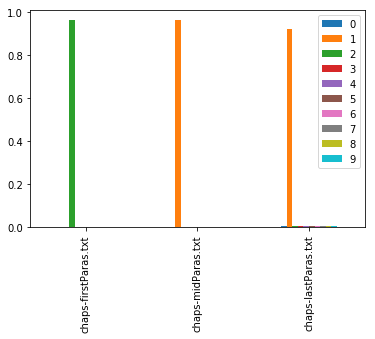

In [65]:
pd.DataFrame(ldaOut, index=filenames).plot(kind='bar')

In [51]:
model.topic_weights(ldaOut)

array([ 0.29008532,  0.32457656,  0.32435285,  0.00871218,  0.00871218,
        0.00871216,  0.00871223,  0.00871213,  0.0087122 ,  0.0087122 ])

In [66]:
model = textacy.tm.TopicModel('nmf', n_topics=3)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
topics = []
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print('topic', topic_idx, ':', '   '.join(top_terms))
    topics.append(' '.join(top_terms))

topic 0 : certain   sun   believe   clothe   conversation   st.   train   journey   branch   whether
topic 1 :        laugh   reply   ah   thou   shepherd   mutter   box   english   cave
topic 2 : medicine   violently   fully   tall   cave   mountain   reunion   apart   nestor   discover
